In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import datetime as dt

In [2]:
fdf = pd.read_csv("D:\DATA_Science\DATASET\WEEK05_AdvancedAnalytics\data_member.csv", index_col=0) # for Windows
# fdf = pd.read_csv('~/Documents/DATAScience/TempBeforeGit/member and transaction data/data member.csv', index_col=0) # for MacOS

fdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590565 entries, 0 to 590564
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ent              590565 non-null  object
 1   original_status  590565 non-null  object
 2   join_month       590565 non-null  int64 
 3   join_year        590565 non-null  int64 
 4   sponsor          590565 non-null  object
dtypes: int64(2), object(3)
memory usage: 27.0+ MB


In [3]:
## FOR Windows
t21_df = pd.read_csv("D:\DATA_Science\DATASET\WEEK05_AdvancedAnalytics\\new_transaction 2021.csv", index_col=0)
t22_df = pd.read_csv("D:\DATA_Science\DATASET\WEEK05_AdvancedAnalytics\\new_transaction 2022.csv", index_col=0)
t23_df = pd.read_csv("D:\DATA_Science\DATASET\WEEK05_AdvancedAnalytics\\new_transaction 2023.csv", index_col=0)

## FOR Mac
# t21_df = pd.read_csv('~/Documents/DATAScience/TempBeforeGit/member and transaction data/new_transaction 2021.csv', index_col=0)
# t22_df = pd.read_csv('~/Documents/DATAScience/TempBeforeGit/member and transaction data/new_transaction 2022.csv', index_col=0)
# t23_df = pd.read_csv('~/Documents/DATAScience/TempBeforeGit/member and transaction data/new_transaction 2023.csv', index_col=0)

tall_df = pd.concat([t21_df,t22_df,t23_df])
tall_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4129114 entries, 0 to 643128
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   payment_date       object 
 1   ent                object 
 2   center             object 
 3   total_amount       float64
 4   discount           float64
 5   paid_amount        int64  
 6   trans_origin_type  object 
 7   product            object 
 8   qty                int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 315.0+ MB


In [4]:
## for Windows

ff = pd.read_csv('D:\DATA_Science\DATASET\WEEK05_AdvancedAnalytics\\transaction 2021.csv', index_col=0)
ff1 = pd.read_csv('D:\DATA_Science\DATASET\WEEK05_AdvancedAnalytics\\transaction 2022.csv', index_col=0)
ff2 = pd.read_csv('D:\DATA_Science\DATASET\WEEK05_AdvancedAnalytics\\transaction 2023.csv', index_col=0)

## for MacOS

# ff = pd.read_csv('~/Documents/DATAScience/TempBeforeGit/member and transaction data/transaction 2021.csv', index_col=0)
# ff1 = pd.read_csv('~/Documents/DATAScience/TempBeforeGit/member and transaction data/transaction 2022.csv', index_col=0)
# ff2 = pd.read_csv('~/Documents/DATAScience/TempBeforeGit/member and transaction data/transaction 2023.csv', index_col=0)

o_df = pd.concat([ff,ff1,ff2])
o_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2406316 entries, 0 to 362108
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   payment_date       object 
 1   ent                object 
 2   center             object 
 3   product_json       object 
 4   total_amount       float64
 5   discount           float64
 6   paid_amount        int64  
 7   trans_origin_type  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 165.2+ MB


# STEP 1
- Clean DATA

In [5]:
fdf['join'] = pd.to_datetime(fdf['join_year'].astype(str) + '/' + fdf['join_month'].astype(str) + '/01')
fdf = fdf.loc[:,['ent','original_status','sponsor','join']]
fdf['mem_duration(months)'] = round((dt.datetime(2023, 7, 1)-fdf['join'])/np.timedelta64(1, 'M'))

fdf

,ent,original_status,sponsor,join,mem_duration(months)
0,UCC4CC4F,-,8844CQCEY,2014-05-01,110.0
1,UCC4CCEK,-,8844CQCCU,2014-05-01,110.0
2,UCC4CC15,-,8844CQCEY,2014-05-01,110.0
3,UCC4CCR2,-,8844CQCEY,2014-05-01,110.0
4,UCC4CCJP,-,8844CQCEY,2014-05-01,110.0
...,...,...,...,...,...
590560,H3CCC43B,A,H3CCC4R2,2010-07-01,156.0
590561,H3CCC4ZY,A,H3CCC4JP,2010-06-01,157.0
590562,H3CCCEC7,A,H3CCC4JP,2010-07-01,156.0
590563,H3CCCE4I,A,H3CCC4JP,2010-07-01,156.0


In [6]:
# Change Date format
tall_df['payment_date'] = pd.to_datetime(tall_df['payment_date'], format='%Y-%m-%d %H:%M:%S')
tall_df['payment_date'] = pd.to_datetime( tall_df['payment_date'].dt.to_period('M').astype(str) )

o_df['payment_date'] = pd.to_datetime(o_df['payment_date'], format='%Y-%m-%d %H:%M:%S')
o_df['payment_date'] = pd.to_datetime( o_df['payment_date'].dt.to_period('M').astype(str) )

tall_df

,payment_date,ent,center,total_amount,discount,paid_amount,trans_origin_type,product,qty
0,2021-01-01,TCC43RQQZ3B,TKC4CJ,1627000.0,0.0,0,online,1ECZ,1
1,2021-01-01,TCC43RQQZ3B,TKC4CJ,1627000.0,0.0,0,online,8CEC4Q,1
2,2021-01-01,TCC4Q4JZ4Q0,TKCEWQ,594000.0,0.0,0,online,4E4W,2
3,2021-01-01,TCC4Q4JZ4Q0,TKCEWQ,594000.0,0.0,0,online,DC4CC4,1
4,2021-01-01,TCC4RJ11QE7,TKC14E,468000.0,0.0,0,online,IC4CC4,1
...,...,...,...,...,...,...,...,...,...
643124,2023-07-01,TCCEREZCC10,TKC1Z4,2500.0,NaN,2500,offline,KCQCEJ,1
643125,2023-07-01,TCCEQ1RJ3JY,TKC1Z4,2500.0,NaN,2500,offline,KCQCEJ,1
643126,2023-07-01,TCCEQ4Z4R4Y,TKC1Z4,2500.0,NaN,2500,offline,KCQCEJ,1
643127,2023-07-01,TCCEQEZJQ4F,TKC1Z4,2500.0,NaN,2500,offline,KCQCER,1


- Transform

In [7]:
# Prepare Columns

j0 = pd.DataFrame(o_df.groupby(by=['ent'])['total_amount'].apply(lambda x: x.sum()))
j1 = pd.DataFrame(o_df.loc[o_df['payment_date'] > dt.datetime(2023, 4, 1)
                                ].groupby(by=['ent'])['total_amount'].apply(lambda x: x.sum())
                                ).rename(columns={'total_amount':'total_last_3m'})                       
j2 = pd.DataFrame(o_df.loc[o_df['payment_date'] > dt.datetime(2023, 1, 1)
                                ].groupby(by=['ent'])['total_amount'].apply(lambda x: x.sum())
                                ).rename(columns={'total_amount':'total_last_6m'}) 

j3 = pd.DataFrame(o_df.loc[o_df['trans_origin_type']=='online'
                                ].groupby(by=['ent'])['total_amount'].apply(lambda x: x.sum())
                                ).rename(columns={'total_amount':'total_online'}) 
j4 = pd.DataFrame(o_df.loc[(o_df['payment_date'] > dt.datetime(2023, 4, 1)) 
                                & (o_df['trans_origin_type']=='online')
                                ].groupby(by=['ent'])['total_amount'].apply(lambda x: x.sum())
                                ).rename(columns={'total_amount':'total_last_3m_online'})
j5 = pd.DataFrame(o_df.loc[(o_df['payment_date'] > dt.datetime(2023, 1, 1)) 
                                & (o_df['trans_origin_type']=='online')
                                ].groupby(by=['ent'])['total_amount'].apply(lambda x: x.sum())
                                ).rename(columns={'total_amount':'total_last_6m_online'})

j6 = pd.DataFrame(o_df.loc[o_df['trans_origin_type']=='offline'
                                ].groupby(by=['ent'])['total_amount'].apply(lambda x: x.sum())
                                ).rename(columns={'total_amount':'total_offline'})
j7 = pd.DataFrame(o_df.loc[(o_df['payment_date'] > dt.datetime(2023, 4, 1)) 
                                & (o_df['trans_origin_type']=='offline')
                                ].groupby(by=['ent'])['total_amount'].apply(lambda x: x.sum())
                                ).rename(columns={'total_amount':'total_last_3m_offline'})
j8 = pd.DataFrame(o_df.loc[(o_df['payment_date'] > dt.datetime(2023, 1, 1)) 
                                & (o_df['trans_origin_type']=='offline')
                                ].groupby(by=['ent'])['total_amount'].apply(lambda x: x.sum())
                                ).rename(columns={'total_amount':'total_last_6m_offline'})

############################################################################################################

j9 = pd.DataFrame(fdf.groupby(by=['sponsor'])['ent'].apply(lambda x: x.count())
                  ).rename(columns={'ent':'total_network'})
j10 = o_df.loc[o_df['payment_date'] > dt.datetime(2023, 4, 1),['ent']]
j10 = pd.merge(j10, fdf.loc[:,['ent','sponsor']], how='left', left_on=['ent'], right_on=['ent'])

j10 = pd.DataFrame(j10.groupby(by=['sponsor'])['ent'].apply(lambda x: x.count())
                   ).rename(columns={'ent':'network_last_3m'})

j11 = o_df.loc[o_df['payment_date'] > dt.datetime(2023, 1, 1),['ent']]
j11 = pd.merge(j11, fdf.loc[:,['ent','sponsor']], how='left', left_on=['ent'], right_on=['ent'])

j11 = pd.DataFrame(j11.groupby(by=['sponsor'])['ent'].apply(lambda x: x.count())
                   ).rename(columns={'ent':'network_last_6m'})

############################################################################################################

j12 = pd.DataFrame(o_df.groupby(by=['ent'])['payment_date'].apply(lambda x: x.count())
                   ).rename(columns={'payment_date':'total_transaction'})
j13 = pd.DataFrame(o_df.loc[o_df['payment_date'] > dt.datetime(2023, 4, 1)
                      ].groupby(by=['ent'])['payment_date'].apply(lambda x: x.count())
                      ).rename(columns={'payment_date':'transaction_last3m'})
j14 = pd.DataFrame(o_df.loc[o_df['payment_date'] > dt.datetime(2023, 1, 1)
                      ].groupby(by=['ent'])['payment_date'].apply(lambda x: x.count())
                      ).rename(columns={'payment_date':'transaction_last6m'})

j15 = pd.DataFrame(tall_df.groupby(by=['ent'])['qty'].apply(lambda x: x.sum())).rename(columns={'qty':'total_qty'})
j16 = pd.DataFrame(tall_df.loc[tall_df['payment_date'] > dt.datetime(2023, 4, 1)
                               ].groupby(by=['ent'])['qty'].apply(lambda x: x.sum())
                               ).rename(columns={'qty':'qty_last3m'})
j17 = pd.DataFrame(tall_df.loc[tall_df['payment_date'] > dt.datetime(2023, 1, 1)
                               ].groupby(by=['ent'])['qty'].apply(lambda x: x.sum())
                               ).rename(columns={'qty':'qty_last6m'})

j18 = pd.DataFrame(tall_df.groupby(by=['ent'])['product']
                   .apply(lambda x: x.nunique() )
                   ).rename(columns={'product':'sku_penetrate(%)'})
j18['sku_penetrate(%)'] = round(j18['sku_penetrate(%)']/len(tall_df['product'].unique()),3)
j19 = pd.DataFrame(tall_df.loc[tall_df['payment_date'] > dt.datetime(2023, 4, 1)]
                   .groupby(by=['ent'])['product']
                   .apply(lambda x: x.nunique() )
                   ).rename(columns={'product':'sku_last3m'})
j19['sku_last3m'] = round(j19['sku_last3m']/len(tall_df['product'].unique()),3)
j20 = pd.DataFrame(tall_df.loc[tall_df['payment_date'] > dt.datetime(2023, 1, 1)]
                   .groupby(by=['ent'])['product']
                   .apply(lambda x: x.nunique() )
                   ).rename(columns={'product':'sku_last6m'})
j20['sku_last6m'] = round(j20['sku_last6m']/len(tall_df['product'].unique()),3)

In [8]:
# JOIN COLUMN

df = pd.DataFrame(tall_df['ent'].unique()).rename(columns={0:'ent'})
df = pd.merge(df, fdf.loc[:,['ent','mem_duration(months)']] ,how='left' , left_on=['ent'], right_on=['ent'])

tomerge = [j0,j1,j2,j3,j4,j5,j6,j7,j8,j9,j10,j11,j12,j13,j14,j15,j16,j17,j18,j19,j20]

for n,i in enumerate(tomerge) : 
    if 9 <= n <= 11 :
        df = pd.merge(df, i ,how='left' , left_on=['ent'], right_on=['sponsor'])
    else : 
        df = pd.merge(df, i ,how='left' , left_on=['ent'], right_on=['ent'])

df

,ent,mem_duration(months),total_amount,total_last_3m,total_last_6m,total_online,total_last_3m_online,total_last_6m_online,total_offline,total_last_3m_offline,...,network_last_6m,total_transaction,transaction_last3m,transaction_last6m,total_qty,qty_last3m,qty_last6m,sku_penetrate(%),sku_last3m,sku_last6m
0,TCC43RQQZ3B,NaN,2037000.0,NaN,NaN,1627000.0,NaN,NaN,410000.0,NaN,...,NaN,2,NaN,NaN,3,NaN,NaN,0.005,NaN,NaN
1,TCC4Q4JZ4Q0,NaN,795500.0,NaN,NaN,793000.0,NaN,NaN,2500.0,NaN,...,NaN,3,NaN,NaN,5,NaN,NaN,0.007,NaN,NaN
2,TCC4RJ11QE7,43.0,31365000.0,NaN,1005000.0,28385000.0,NaN,1005000.0,2980000.0,NaN,...,1.0,23,NaN,1.0,63,NaN,3.0,0.032,NaN,0.002
3,TCC434QRCJY,NaN,341000.0,NaN,NaN,341000.0,NaN,NaN,NaN,NaN,...,NaN,1,NaN,NaN,1,NaN,NaN,0.002,NaN,NaN
4,TCC43RRCE10,NaN,189000.0,NaN,NaN,189000.0,NaN,NaN,NaN,NaN,...,NaN,1,NaN,NaN,1,NaN,NaN,0.002,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580819,TCCEQ1Z1QC7,0.0,1538000.0,1538000.0,1538000.0,NaN,NaN,NaN,1538000.0,1538000.0,...,NaN,1,1.0,1.0,6,6.0,6.0,0.007,0.007,0.007
580820,TCCEQ1Z1QEF,0.0,1538000.0,1538000.0,1538000.0,NaN,NaN,NaN,1538000.0,1538000.0,...,NaN,1,1.0,1.0,6,6.0,6.0,0.007,0.007,0.007
580821,TCCEQ1Z1QW0,0.0,1538000.0,1538000.0,1538000.0,NaN,NaN,NaN,1538000.0,1538000.0,...,NaN,1,1.0,1.0,6,6.0,6.0,0.007,0.007,0.007
580822,TCCEQ1Q1CE7,1.0,498000.0,498000.0,498000.0,498000.0,498000.0,498000.0,NaN,NaN,...,NaN,1,1.0,1.0,1,1.0,1.0,0.002,0.002,0.002


In [9]:
df.isna().sum()

ent                           0
mem_duration(months)     205981
total_amount                  0
total_last_3m            531837
total_last_6m            492956
total_online             239197
total_last_3m_online     548628
total_last_6m_online     521431
total_offline            171647
total_last_3m_offline    552479
total_last_6m_offline    527940
total_network            498478
network_last_3m          562046
network_last_6m          553084
total_transaction             0
transaction_last3m       531837
transaction_last6m       492956
total_qty                     0
qty_last3m               531837
qty_last6m               492956
sku_penetrate(%)              0
sku_last3m               531837
sku_last6m               492956
dtype: int64

In [10]:
df['ticket_size'] = round(df['total_amount']/df['total_qty'],3)
df['ticket_size_3m'] = round(df['total_last_3m']/df['qty_last3m'],3)
df['ticket_size_6m'] = round(df['total_last_6m']/df['qty_last6m'],3)

df = df.drop(columns=['total_qty','qty_last3m','qty_last6m'])
df = df.fillna(0)
df

,ent,mem_duration(months),total_amount,total_last_3m,total_last_6m,total_online,total_last_3m_online,total_last_6m_online,total_offline,total_last_3m_offline,...,network_last_6m,total_transaction,transaction_last3m,transaction_last6m,sku_penetrate(%),sku_last3m,sku_last6m,ticket_size,ticket_size_3m,ticket_size_6m
0,TCC43RQQZ3B,0.0,2037000.0,0.0,0.0,1627000.0,0.0,0.0,410000.0,0.0,...,0.0,2,0.0,0.0,0.005,0.000,0.000,679000.000,0.000,0.000
1,TCC4Q4JZ4Q0,0.0,795500.0,0.0,0.0,793000.0,0.0,0.0,2500.0,0.0,...,0.0,3,0.0,0.0,0.007,0.000,0.000,159100.000,0.000,0.000
2,TCC4RJ11QE7,43.0,31365000.0,0.0,1005000.0,28385000.0,0.0,1005000.0,2980000.0,0.0,...,1.0,23,0.0,1.0,0.032,0.000,0.002,497857.143,0.000,335000.000
3,TCC434QRCJY,0.0,341000.0,0.0,0.0,341000.0,0.0,0.0,0.0,0.0,...,0.0,1,0.0,0.0,0.002,0.000,0.000,341000.000,0.000,0.000
4,TCC43RRCE10,0.0,189000.0,0.0,0.0,189000.0,0.0,0.0,0.0,0.0,...,0.0,1,0.0,0.0,0.002,0.000,0.000,189000.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580819,TCCEQ1Z1QC7,0.0,1538000.0,1538000.0,1538000.0,0.0,0.0,0.0,1538000.0,1538000.0,...,0.0,1,1.0,1.0,0.007,0.007,0.007,256333.333,256333.333,256333.333
580820,TCCEQ1Z1QEF,0.0,1538000.0,1538000.0,1538000.0,0.0,0.0,0.0,1538000.0,1538000.0,...,0.0,1,1.0,1.0,0.007,0.007,0.007,256333.333,256333.333,256333.333
580821,TCCEQ1Z1QW0,0.0,1538000.0,1538000.0,1538000.0,0.0,0.0,0.0,1538000.0,1538000.0,...,0.0,1,1.0,1.0,0.007,0.007,0.007,256333.333,256333.333,256333.333
580822,TCCEQ1Q1CE7,1.0,498000.0,498000.0,498000.0,498000.0,498000.0,498000.0,0.0,0.0,...,0.0,1,1.0,1.0,0.002,0.002,0.002,498000.000,498000.000,498000.000


In [11]:
def amountvsyr(df):
    # Create a scatter plot
    sns.scatterplot(x='mem_duration(months)', y='total_amount', data=df)

    mean_x = df['mem_duration(months)'].mean()
    mean_y = df['total_amount'].mean()

    # Plot horizontal mean line
    plt.axhline(mean_y, color='r', linestyle='--', label='Sum Total Amount')

    # Plot vertical mean line
    plt.axvline(mean_x, color='b', linestyle='--', label='Month')

    # Add legend
    plt.legend()

    plt.xlabel('Month')
    plt.ylabel('Sum Total Amount')
    plt.title('Sum Total Amount VS Duration (Months)')

    # Show the plot
    plt.show()

In [12]:
# df.to_csv('~/Documents/DATAScience/TempBeforeGit/member and transaction data/week05_transform_data-with-outlier.csv')

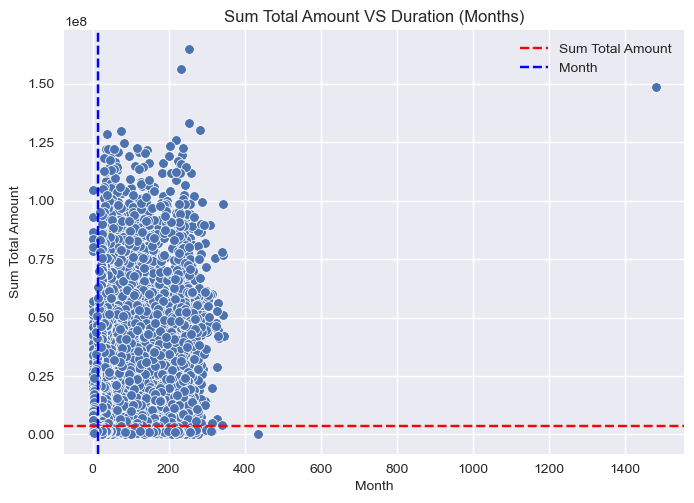

In [13]:
plt.style.use('seaborn-v0_8')

amountvsyr(df)

In [14]:
df = df.reset_index(drop = True)
df

,ent,mem_duration(months),total_amount,total_last_3m,total_last_6m,total_online,total_last_3m_online,total_last_6m_online,total_offline,total_last_3m_offline,...,network_last_6m,total_transaction,transaction_last3m,transaction_last6m,sku_penetrate(%),sku_last3m,sku_last6m,ticket_size,ticket_size_3m,ticket_size_6m
0,TCC43RQQZ3B,0.0,2037000.0,0.0,0.0,1627000.0,0.0,0.0,410000.0,0.0,...,0.0,2,0.0,0.0,0.005,0.000,0.000,679000.000,0.000,0.000
1,TCC4Q4JZ4Q0,0.0,795500.0,0.0,0.0,793000.0,0.0,0.0,2500.0,0.0,...,0.0,3,0.0,0.0,0.007,0.000,0.000,159100.000,0.000,0.000
2,TCC4RJ11QE7,43.0,31365000.0,0.0,1005000.0,28385000.0,0.0,1005000.0,2980000.0,0.0,...,1.0,23,0.0,1.0,0.032,0.000,0.002,497857.143,0.000,335000.000
3,TCC434QRCJY,0.0,341000.0,0.0,0.0,341000.0,0.0,0.0,0.0,0.0,...,0.0,1,0.0,0.0,0.002,0.000,0.000,341000.000,0.000,0.000
4,TCC43RRCE10,0.0,189000.0,0.0,0.0,189000.0,0.0,0.0,0.0,0.0,...,0.0,1,0.0,0.0,0.002,0.000,0.000,189000.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580819,TCCEQ1Z1QC7,0.0,1538000.0,1538000.0,1538000.0,0.0,0.0,0.0,1538000.0,1538000.0,...,0.0,1,1.0,1.0,0.007,0.007,0.007,256333.333,256333.333,256333.333
580820,TCCEQ1Z1QEF,0.0,1538000.0,1538000.0,1538000.0,0.0,0.0,0.0,1538000.0,1538000.0,...,0.0,1,1.0,1.0,0.007,0.007,0.007,256333.333,256333.333,256333.333
580821,TCCEQ1Z1QW0,0.0,1538000.0,1538000.0,1538000.0,0.0,0.0,0.0,1538000.0,1538000.0,...,0.0,1,1.0,1.0,0.007,0.007,0.007,256333.333,256333.333,256333.333
580822,TCCEQ1Q1CE7,1.0,498000.0,498000.0,498000.0,498000.0,498000.0,498000.0,0.0,0.0,...,0.0,1,1.0,1.0,0.002,0.002,0.002,498000.000,498000.000,498000.000


# STEP 2
- Prepare DATA
- Selecting clustering samples.

In [15]:
# pip install scikit-learn-extra

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.cluster import KMeans

from sklearn.mixture import GaussianMixture
from yellowbrick.cluster import KElbowVisualizer

In [17]:
# Prepare data for an Elbow Visualization & Clustering

dfk = df.drop(columns=['ent']).reset_index(drop=True)

bfc = Pipeline(
    steps=[("normalization", MinMaxScaler()),
           ('PCA',PCA(n_components=2, random_state=42))
           ])

dfk = bfc.fit_transform(dfk)

dfk = pd.DataFrame(dfk)

display(dfk)

,0,1
0,-0.045262,0.029627
1,-0.034756,-0.074745
2,0.188725,-0.013609
3,-0.050331,-0.032668
4,-0.047893,-0.062697
...,...,...
580819,0.167084,0.001580
580820,0.167084,0.001580
580821,0.167084,0.001580
580822,0.139923,0.119100


K-Elbow Method

In [18]:
# model = KMeans(n_init='auto')
# visualizer = KElbowVisualizer(model, k=(2,12))

# visualizer.fit(dfk)
# visualizer.show()

Silhouette Method

In [19]:
# from sklearn.metrics import silhouette_score

# range_n_clusters = [2, 3, 4, 5, 6]
# for n_clusters in range_n_clusters:
#     clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
#     cluster_labels = clusterer.fit_predict(dfk)
#     silhouette_avg = silhouette_score(dfk, cluster_labels)
#     print("For n_clusters =",n_clusters,"The average silhouette_score is :",silhouette_avg)

BI SCORE

In [20]:
def gmm_bic_score(estimator, X):
    """Callable to pass to GridSearchCV that will use the BIC score."""
    # Make it negative since GridSearchCV expects a score to maximize
    return -estimator.bic(X)

def bicscore(X):
    param_grid = {
        "n_components": range(1, 7),
        "covariance_type": ["spherical", "tied", "diag", "full"] 
        }
    grid_search = GridSearchCV(
        GaussianMixture(), param_grid=param_grid, scoring=gmm_bic_score)

    grid_search.fit(X)

    df = pd.DataFrame(grid_search.cv_results_)[
        ["param_n_components", "param_covariance_type", "mean_test_score"]
    ]
    df["mean_test_score"] = -df["mean_test_score"]
    df = df.rename(
        columns={
            "param_n_components": "Number of components",
            "param_covariance_type": "Type of covariance",
            "mean_test_score": "BIC score",
        }
    )
    return df.sort_values(by="BIC score").head()

In [21]:
bicscore(dfk)

,Number of components,Type of covariance,BIC score
23,6,full,-905153.732622
22,5,full,-892584.854965
17,6,diag,-863040.465397
21,4,full,-850699.579829
16,5,diag,-833495.158874


In [22]:
raise Exception

Exception: 

# RESULTS

- Gaussian Mixture

> Gaussian mixture models are also relatively robust to outliers, meaning that they can still yield accurate results even if there are some data points that do not fit neatly into any of the clusters.
>
> source : https://vitalflux.com/gaussian-mixture-models-what-are-they-when-to-use/

In [23]:
cl = GaussianMixture(n_components=6, random_state=42)

df['cluster'] = cl.fit(dfk).predict(dfk)
df

,ent,mem_duration(months),total_amount,total_last_3m,total_last_6m,total_online,total_last_3m_online,total_last_6m_online,total_offline,total_last_3m_offline,...,total_transaction,transaction_last3m,transaction_last6m,sku_penetrate(%),sku_last3m,sku_last6m,ticket_size,ticket_size_3m,ticket_size_6m,cluster
0,TCC43RQQZ3B,0.0,2037000.0,0.0,0.0,1627000.0,0.0,0.0,410000.0,0.0,...,2,0.0,0.0,0.005,0.000,0.000,679000.000,0.000,0.000,0
1,TCC4Q4JZ4Q0,0.0,795500.0,0.0,0.0,793000.0,0.0,0.0,2500.0,0.0,...,3,0.0,0.0,0.007,0.000,0.000,159100.000,0.000,0.000,0
2,TCC4RJ11QE7,43.0,31365000.0,0.0,1005000.0,28385000.0,0.0,1005000.0,2980000.0,0.0,...,23,0.0,1.0,0.032,0.000,0.002,497857.143,0.000,335000.000,5
3,TCC434QRCJY,0.0,341000.0,0.0,0.0,341000.0,0.0,0.0,0.0,0.0,...,1,0.0,0.0,0.002,0.000,0.000,341000.000,0.000,0.000,0
4,TCC43RRCE10,0.0,189000.0,0.0,0.0,189000.0,0.0,0.0,0.0,0.0,...,1,0.0,0.0,0.002,0.000,0.000,189000.000,0.000,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580819,TCCEQ1Z1QC7,0.0,1538000.0,1538000.0,1538000.0,0.0,0.0,0.0,1538000.0,1538000.0,...,1,1.0,1.0,0.007,0.007,0.007,256333.333,256333.333,256333.333,5
580820,TCCEQ1Z1QEF,0.0,1538000.0,1538000.0,1538000.0,0.0,0.0,0.0,1538000.0,1538000.0,...,1,1.0,1.0,0.007,0.007,0.007,256333.333,256333.333,256333.333,5
580821,TCCEQ1Z1QW0,0.0,1538000.0,1538000.0,1538000.0,0.0,0.0,0.0,1538000.0,1538000.0,...,1,1.0,1.0,0.007,0.007,0.007,256333.333,256333.333,256333.333,5
580822,TCCEQ1Q1CE7,1.0,498000.0,498000.0,498000.0,498000.0,498000.0,498000.0,0.0,0.0,...,1,1.0,1.0,0.002,0.002,0.002,498000.000,498000.000,498000.000,5


In [24]:
# df.to_csv('D:\DATA_Science\GitHub\BeforeGIT\week05_segment_result.csv')

# for MacOS
# df.to_csv('~/Documents/DATAScience/TempBeforeGit/member and transaction data/week05_segment_result.csv')

- Feature Importance

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


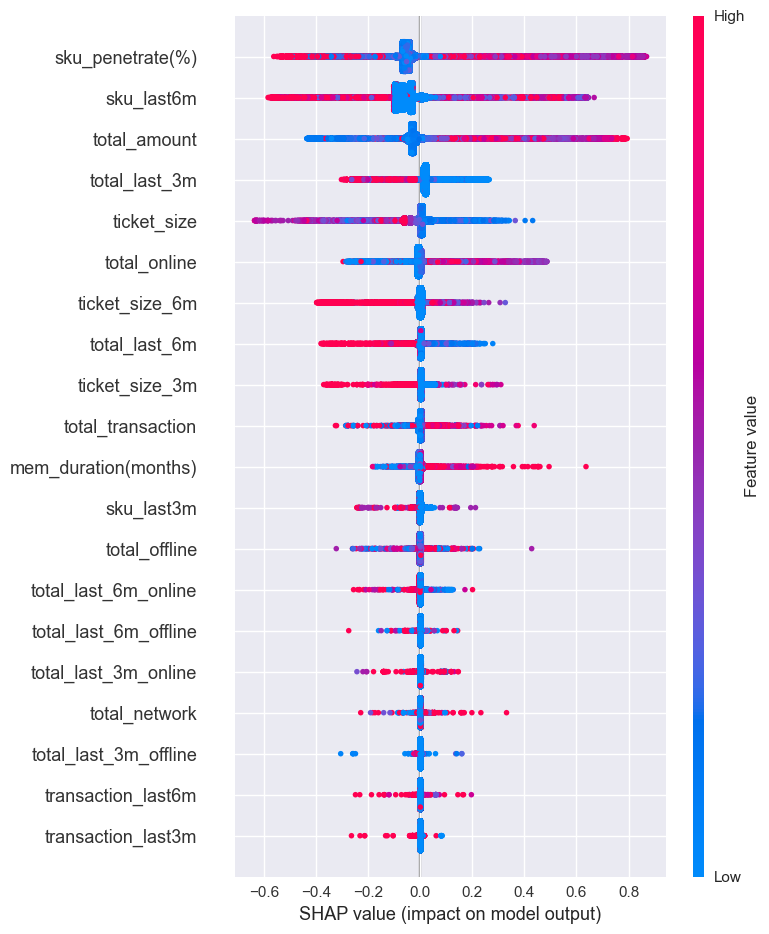

In [26]:
# decision tree for feature importance on a regression problem
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# define dataset
X = df.drop(columns=['ent','cluster'])
y = df['cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# define the model
# model = RandomForestClassifier()
model = DecisionTreeClassifier()
# fit the model
model.fit(X, y)

import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(model)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(X_test)

# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values[1], X_test)

PLOT (KMeans)

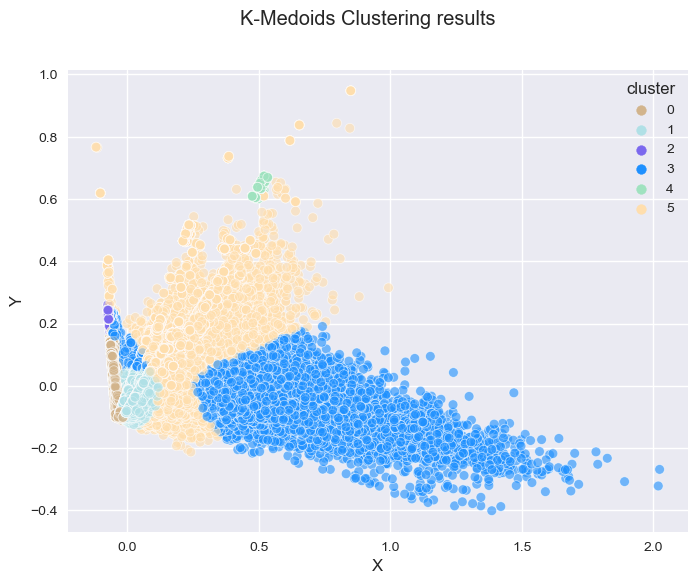

In [27]:
# Getting unique labels
 
dfk['cluster'] = df['cluster']
 
# plotting the results:
 
plt.style.use('seaborn-v0_8')

fig, axe = plt.subplots(figsize=(8,6))

color_dict = dict({0:'#D2B48C', 1:'#B0E0E6',
                  2: '#7B68EE',3: '#1E90FF',4: '#9FE2BF',5: '#FFDEAD'})

g = sns.scatterplot(data = dfk , x=0, y=1, hue="cluster", ax=axe ,alpha=0.6, palette=color_dict)
axe.set(xlabel='X', ylabel='Y')
fig.suptitle("K-Medoids Clustering results")
plt.show()